# LENDING CLUB CASE STUDY

## 1. Business Objective

- Lending club is the largest online loan marketplace, facilitating personal loans, business loans, and financing of medical procedures at lower interest rate loans through a fast online interface.
    <br><br>
- Two types of risks are associated with any company’s decision of lending loan
    <br><br>
	1) If the applicant is likely to repay the loan, then not approving the loan results in a loss of business to the company.
    <br><br>
    2) If the applicant is not likely to repay the loan, i.e. he/she is likely to default, then approving the loan may lead to a financial loss(credit loss) for the company.
    <br><br>
- The aim of this case study is to understand the driving factors (or driver variables) behind loan default (2nd type of risk), i.e. the variables which are strong indicators of default. Thus, the company can utilize this knowledge for its portfolio and risk assessment. 


In [1]:
# Importing requiried libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import io
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.figure_factory as ff

import plotly.express as px

In [2]:
# Palettes for seaborn library
pal = sns.color_palette("Set1")
pal2 = sns.color_palette("Set2")
pal3 = sns.color_palette("bright")
pal4 = sns.color_palette("colorblind")

## 2. Data Loading and Understanding

In [3]:
# Loding Data set
loan_df = pd.read_csv("loan.csv")
loan_df.head()

C:\Users\DELL\anaconda3.8\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning:

Columns (47) have mixed types.Specify dtype option on import or set low_memory=False.



,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [4]:
print('Total numbers of rows in dataset are: ', loan_df.shape[0])
print('Total numbers of features in dataset are: ', loan_df.shape[1])

Total numbers of rows in dataset are:  39717
Total numbers of features in dataset are:  111


In [5]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [6]:
print("The column names are:\n", loan_df.columns.tolist())

The column names are:
 ['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length', 'home_ownership', 'annual_inc', 'verification_status', 'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose', 'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d', 'collections_12_mths_ex_med', 'mths_since_last_major_derog', 'policy_code', 'application_type', 'annual_inc_joint', 'dti_joint', 'verification_status_joint', 'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m', 'open_il_6m', 

 ## 3. Data Cleaning

In [7]:
# Removing data for customers with loan status as "Current", as it is not usefull for our case study

loan_df = loan_df[loan_df['loan_status']!='Current']
loan_df.reset_index(inplace=True, drop=True)

In [8]:
loan_df.shape

(38577, 111)

### Fixing Rows and Columns

#### Dropping Unnecesary Columns

In [9]:
# Missing Value Check
loan_df.isnull().sum().values

array([    0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,  2386,  1033,     0,     0,     0,     0,     0,     0,
           0, 12527,     0,    11,     0,     0,     0,     0,     0,
           0, 24905, 35837,     0,     0,     0,    50,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
          71,     0, 38577,     2,    56, 38577,     0,     0, 38577,
       38577, 38577,     0, 38577, 38577, 38577, 38577, 38577, 38577,
       38577, 38577, 38577, 38577, 38577, 38577, 38577, 38577, 38577,
       38577, 38577, 38577, 38577, 38577, 38577,    56,     0, 38577,
       38577, 38577, 38577, 38577, 38577, 38577, 38577, 38577, 38577,
       38577, 38577, 38577, 38577, 38577, 38577, 38577, 38577, 38577,
       38577, 38577, 38577, 38577, 38577, 38577,   697,    39, 38577,
       38577, 38577, 38577], dtype=int64)

In [10]:
# There are lots of columns with all nan values. So, dropping them. 
loan_df.dropna(axis=1, how="all", inplace=True)
loan_df.shape

(38577, 56)

In [11]:
# Again check  missing values
loan_df.isnull().sum().values

array([    0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,  2386,  1033,     0,     0,     0,     0,     0,     0,
           0, 12527,     0,    11,     0,     0,     0,     0,     0,
           0, 24905, 35837,     0,     0,     0,    50,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
          71,     0,     2,    56,     0,     0,     0,    56,     0,
         697,    39], dtype=int64)

In [12]:
# Columns having more than 50% missing values
is_50_Null = (loan_df.isnull().sum()/len(loan_df))*100 >= 50
col_50_nulls = is_50_Null[is_50_Null.values==True].index.tolist()
col_50_nulls

['mths_since_last_delinq', 'mths_since_last_record']

In [13]:
# Removing columns having more than 50% missing values
loan_df.drop(col_50_nulls, inplace = True, axis = 1)
loan_df.shape

(38577, 54)

In [14]:
loan_df.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose',
       'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'initial_list_status',
       'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'last_credit_pull_d', 'collections_12_mths_ex_med', 'policy_code',
       'application_type', 'acc_now_delinq', 'chargeoff_within_12_mths',
       'delinq_amnt', 'pub_rec_bankruptcies', 'tax_liens'],
      dtype='object')

In [15]:
#Finding unique values in each column
for col in loan_df:
    if len(loan_df[col].unique()) < 3: 
        print(col, " - ", loan_df[col].unique())

term  -  [' 36 months' ' 60 months']
loan_status  -  ['Fully Paid' 'Charged Off']
pymnt_plan  -  ['n']
initial_list_status  -  ['f']
out_prncp  -  [0.]
out_prncp_inv  -  [0.]
collections_12_mths_ex_med  -  [ 0. nan]
policy_code  -  [1]
application_type  -  ['INDIVIDUAL']
acc_now_delinq  -  [0]
chargeoff_within_12_mths  -  [ 0. nan]
delinq_amnt  -  [0]
tax_liens  -  [ 0. nan]


In [16]:
# Removing columns which seems to be of not that usefull

# columns which contains id or text values
cols_lst1 = ['id', 'member_id', 'url', 'title', 'desc', 'emp_title', 'zip_code']

# columns which are single valued or contains just nans. 
cols_lst2 = ['initial_list_status', 'collections_12_mths_ex_med', 'chargeoff_within_12_mths', 
             'policy_code', 'application_type', 'acc_now_delinq', 'delinq_amnt', 'tax_liens', 'pymnt_plan']

# columns which are related to post approval feature and not usefull now
cols_lst3 = ['delinq_2yrs', 'revol_bal', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt', 'revol_util',
       'last_credit_pull_d', 'earliest_cr_line']

loan_df.drop(cols_lst1, inplace = True, axis = 1)
loan_df.drop(cols_lst2, inplace = True, axis = 1)
loan_df.drop(cols_lst3, inplace = True, axis = 1)
loan_df.shape

(38577, 22)

In [17]:
loan_df.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'addr_state', 'dti', 'inq_last_6mths', 'open_acc', 'pub_rec',
       'total_acc', 'pub_rec_bankruptcies'],
      dtype='object')

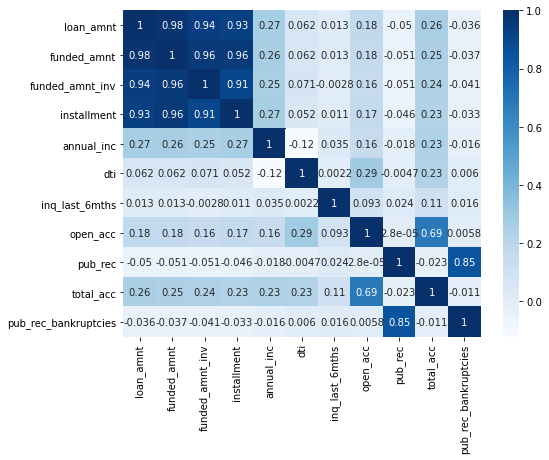

In [18]:
# Finding correlations among continuous quantitative variable 
Var_Corr = loan_df.corr()
fig, ax = plt.subplots(figsize=(8,6))

# Plotting the heatmap and annotation on it
sns.heatmap(Var_Corr, xticklabels=Var_Corr.columns, yticklabels=Var_Corr.columns, annot=True, cmap="Blues", ax=ax)

In [19]:
# Repeatative columns and seems not too usefull
cols_lst4 = ['funded_amnt', 'funded_amnt_inv', 'installment', 'pub_rec_bankruptcies', 'total_acc']

# Dropping repeatative and and not too usefull columns 
loan_df.drop(cols_lst4, inplace = True, axis = 1)
loan_df.shape

(38577, 17)

In [20]:
# Missing value check column wise
loan_df.isnull().sum().sort_values(ascending=False)

emp_length             1033
pub_rec                   0
annual_inc                0
term                      0
int_rate                  0
grade                     0
sub_grade                 0
home_ownership            0
verification_status       0
open_acc                  0
issue_d                   0
loan_status               0
purpose                   0
addr_state                0
dti                       0
inq_last_6mths            0
loan_amnt                 0
dtype: int64

In [21]:
# Missing value check row wise 
round(loan_df.isnull().sum(axis = 1).value_counts(normalize = True)*100,2)

0    97.32
1     2.68
dtype: float64

### Standardizing Values

In [22]:
# Removing years from employee length column
loan_df['emp_length'] = loan_df['emp_length'].apply(lambda x: str(x).rstrip(' years'))
        #.apply(lambda x: x.rstrip('+')).apply(lambda x: '0' if x=='< 1' else x).apply(lambda x: 'unknown' if x=='nan' else x)

In [23]:
# Removing % from interest rate column
loan_df['int_rate'] = loan_df['int_rate'].apply(lambda x: float(x.split('%')[0]))

### Filling missing values

In [24]:
# Replace ing null values with 'Unknown' Label for employee length column
loan_df['emp_length'] = loan_df['emp_length'].apply(lambda x: 'unknown' if x=='nan' else x)

### Deriving new columns

In [25]:
# Deriving loan issue month and loan issue year from loan issue date column 
loan_df['issue_month'] = loan_df['issue_d'].apply(lambda x : x.split("-")[0])
loan_df['issue_year'] = loan_df['issue_d'].apply(lambda x : "20" + x.split("-")[1])

# Dropping loan issue date column
loan_df.drop('issue_d', axis=1, inplace=True)

#### Checking subset of the given loan dataset

In [26]:
# Missing value check column wise 
loan_df.isnull().sum().sort_values(ascending=False)

issue_year             0
issue_month            0
term                   0
int_rate               0
grade                  0
sub_grade              0
emp_length             0
home_ownership         0
annual_inc             0
verification_status    0
loan_status            0
purpose                0
addr_state             0
dti                    0
inq_last_6mths         0
open_acc               0
pub_rec                0
loan_amnt              0
dtype: int64

In [27]:
# Missing value check row wise 
round(loan_df.isnull().sum(axis = 1).value_counts(normalize = True)*100,2)

0    100.0
dtype: float64

In [28]:
# Checking the type of each column in cleaned dataframe 
loan_df.dtypes

loan_amnt                int64
term                    object
int_rate               float64
grade                   object
sub_grade               object
emp_length              object
home_ownership          object
annual_inc             float64
verification_status     object
loan_status             object
purpose                 object
addr_state              object
dti                    float64
inq_last_6mths           int64
open_acc                 int64
pub_rec                  int64
issue_month             object
issue_year              object
dtype: object

In [29]:
# Observing top 5 rows of cleaned dataframe
loan_df.head()

,loan_amnt,term,int_rate,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,addr_state,dti,inq_last_6mths,open_acc,pub_rec,issue_month,issue_year
0,5000,36 months,10.65,B,B2,10+,RENT,24000.0,Verified,Fully Paid,credit_card,AZ,27.65,1,3,0,Dec,2011
1,2500,60 months,15.27,C,C4,< 1,RENT,30000.0,Source Verified,Charged Off,car,GA,1.00,5,3,0,Dec,2011
2,2400,36 months,15.96,C,C5,10+,RENT,12252.0,Not Verified,Fully Paid,small_business,IL,8.72,2,2,0,Dec,2011
3,10000,36 months,13.49,C,C1,10+,RENT,49200.0,Source Verified,Fully Paid,other,CA,20.00,1,10,0,Dec,2011
4,5000,36 months,7.90,A,A4,3,RENT,36000.0,Source Verified,Fully Paid,wedding,AZ,11.20,3,9,0,Dec,2011


In [30]:
# Observing number of rows and column in loan_df dataframe
loan_df.shape

(38577, 18)

In [31]:
# Listing the names of column in loan_df dataframe
loan_df.columns

Index(['loan_amnt', 'term', 'int_rate', 'grade', 'sub_grade', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'loan_status',
       'purpose', 'addr_state', 'dti', 'inq_last_6mths', 'open_acc', 'pub_rec',
       'issue_month', 'issue_year'],
      dtype='object')

### Outlier Identification

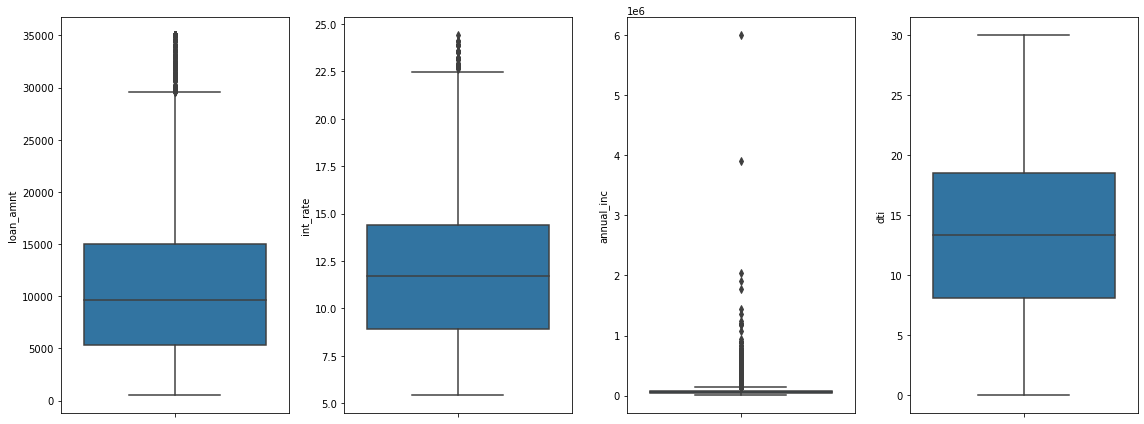

In [32]:
# Identification of outliers for quantitative variables

names = loan_df[['loan_amnt', 'int_rate', 'annual_inc', 'dti']]

ncols = len(names)
fig, axes = plt.subplots(1, 4, figsize=(16, 6))

for name, ax in zip(names, axes.flatten()):
    sns.boxplot(y=name, data=loan_df, orient='v', ax=ax)
    
plt.tight_layout()

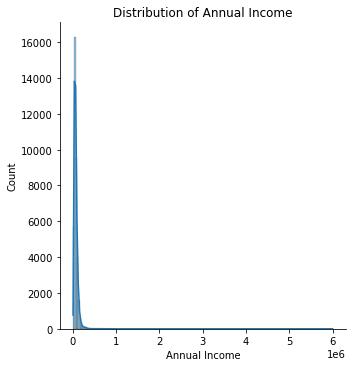

In [33]:
sns.displot(data = loan_df, x = 'annual_inc', bins = 200 , kde = True)
plt.title('Distribution of Annual Income')
plt.xlabel('Annual Income')
plt.show()

> **Outliers detected in Annual Income column**

In [34]:
loan_df.shape

(38577, 18)

### Outlier Treatment

In [35]:
# Removing outliers
# IQR
Q1 = np.percentile(loan_df['annual_inc'], 0, interpolation = 'midpoint')
Q3 = np.percentile(loan_df['annual_inc'], 95, interpolation = 'midpoint')
IQR = Q3 - Q1
# Upper bound
upper = np.where(loan_df['annual_inc'] >= (Q3+1.5*IQR))
# Lower bound
lower = np.where(loan_df['annual_inc'] <= (Q1-1.5*IQR))
loan_df.drop(upper[0], inplace = True)
loan_df.drop(lower[0], inplace = True)

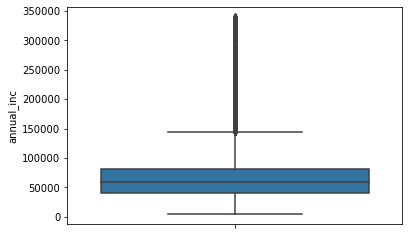

In [36]:
sns.boxplot(y=loan_df['annual_inc'])
plt.show()

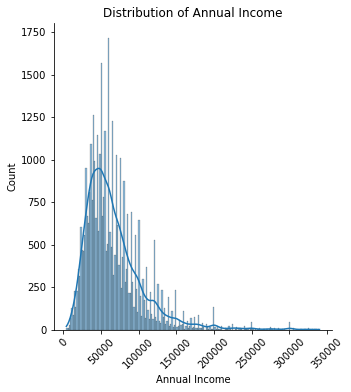

In [37]:
sns.displot(data = loan_df, x = 'annual_inc', bins = 200 , kde = True)
plt.title('Distribution of Annual Income')
plt.xlabel('Annual Income')
plt.xticks(rotation=45)
plt.show()

In [38]:
# Observing number of rows and column in loan_df dataframe after outlier treatment
loan_df.shape

(38445, 18)

 ## 4. Data Analysis

### Analyzing Continuous Quantitative Variables

In [39]:
summary = (loan_df[[i for i in loan_df.columns]].
           describe().transpose().reset_index())

summary = summary.rename(columns = {"index" : "feature"})
summary = np.around(summary,3)

val_lst = [summary['feature'], summary['count'],
           summary['mean'],summary['std'],
           summary['min'], summary['25%'],
           summary['50%'], summary['75%'], summary['max']]

trace  = go.Table(header = dict(values = summary.columns.tolist(),
                                line = dict(color = ['#506784']),
                                fill = dict(color = ['#119DFF']),
                               ),
                  cells  = dict(values = val_lst,
                                line = dict(color = ['#506784']),
                                fill = dict(color = ["lightgrey",'#F5F8FF'])
                               ),
                  columnwidth = [200,60,100,100,60,60,80,80,80])
layout = go.Layout(dict(title = "Variable Summary"),
                   autosize=False,
                    width=900,
                    height=400)
figure = go.Figure(data=[trace],layout=layout)
py.iplot(figure)
plt.savefig("summary.png")

<Figure size 432x288 with 0 Axes>

### Analyzing Target variable

In [40]:
loan_df['loan_status'].value_counts().to_frame()

,loan_status
Fully Paid,32836
Charged Off,5609


In [41]:
# Function to plot percentage in pie plot
def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.3f}%".format(pct, absolute)

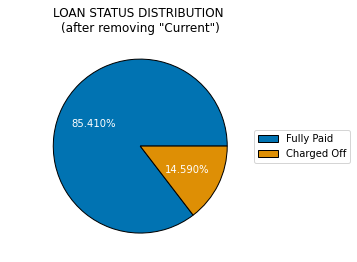

In [42]:
#creating pie chart for target variable
data=loan_df['loan_status'].value_counts().values.tolist()
wedges, texts, autotexts = plt.pie(data, labels = loan_df['loan_status'].value_counts().index.tolist(), colors = pal4, autopct=lambda pct: func(pct, data),
        wedgeprops = { 'linewidth' : 1, 'edgecolor' : 'black' },
                                  textprops=dict(color="w"))

plt.legend(wedges, loan_df['loan_status'].value_counts().index.tolist(),
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))
plt.title('LOAN STATUS DISTRIBUTION \n(after removing "Current")')
plt.show()

In [43]:
# Dataframes for charged off only and fully paid only
loan_charged_off_df = loan_df[loan_df['loan_status'] == 'Charged Off']
loan_fully_paid_df = loan_df[loan_df['loan_status'] == 'Fully Paid']

### 4.1 Analysis on loan_amnt

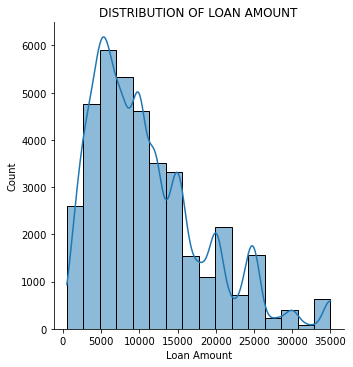

In [44]:
# Univariate Analysis

sns.displot(data = loan_df, x = 'loan_amnt', bins = 16 , kde = True)
plt.title('Distribution of Loan Amount'.upper())
plt.xlabel('Loan Amount')
plt.show()

In [45]:
print(np.percentile(loan_df['loan_amnt'], 25), '-', np.percentile(loan_df['loan_amnt'], 75))

5275.0 - 15000.0


> **50% of customers apply loans in the range of 5275 to 15000**

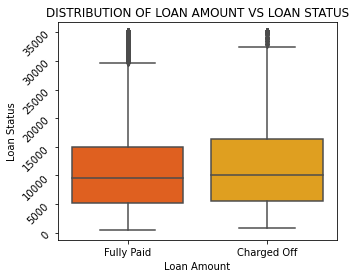

In [46]:
# Segmented Univariate Analysis

plt.figure(figsize = [5,4])
sns.boxplot(x = loan_df['loan_status'], y = loan_df['loan_amnt'], palette = 'autumn',orient = 'v')
plt.title('Distribution of Loan Amount VS Loan Status'.upper())
plt.yticks(rotation = 45)
plt.ylabel('Loan Status')
plt.xlabel('Loan Amount')
plt.show()

> **The distribution of defaulted and non-defaulted customers is almost same** 

In [47]:
# Deriving new columns
#categorized continuous variables into buckets or binnning
loan_df['loan_amnt_cats'] = pd.cut(loan_df['loan_amnt'], [0, 7000, 14000, 21000, 28000, 35000], labels=['0-7k', '7k-14k', '14k-21k', '21k-28k', '28k-35k'])

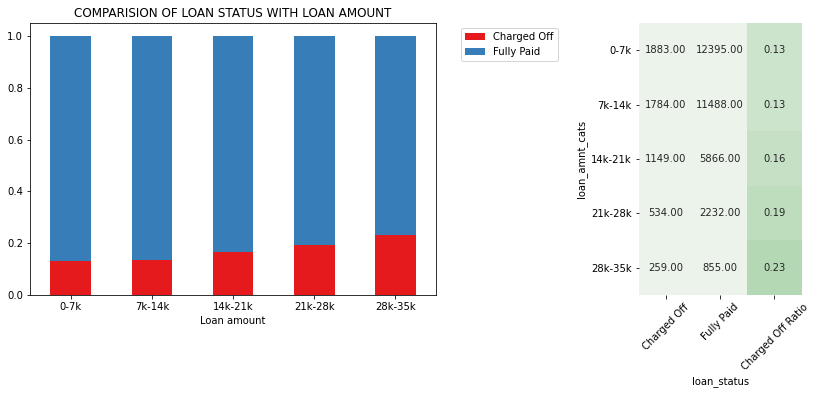

In [48]:
# Bivariate Analysis

fig, axes = plt.subplots(1, 2, figsize = [16,5])


loan_amnt = loan_df.groupby('loan_amnt_cats')['loan_status'].value_counts(normalize=True).unstack()
loan_amnt.plot(kind = 'bar', stacked = True, color=pal, ax=axes[0], linewidth=0.7)
axes[0].legend(bbox_to_anchor = (1.05,1))
axes[0].set_xlabel('Loan amount')
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=0)
axes[0].set_title('COMPARISION OF LOAN STATUS WITH LOAN AMOUNT')    


columns = ["loan_amnt_cats", 'loan_status']
cm = sns.light_palette("green", as_cmap=True)
contingency_matrix = pd.crosstab(loan_df[columns[0]], loan_df[columns[1]])
contingency_matrix['Charged Off Ratio'] = contingency_matrix['Charged Off'] / (contingency_matrix['Charged Off'] + contingency_matrix['Fully Paid'])

ax = axes[1]
ax.set_aspect(1)
columns = ['Charged Off Ratio']
mymatrix = contingency_matrix.copy()
mask = mymatrix.columns.isin(columns)
mymatrix.loc[:, ~mask] = 0
res = sns.heatmap(mymatrix, annot=contingency_matrix, vmin=0, vmax=1, fmt='.2f',cmap=cm, cbar=False)
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45)
axes[1].set_yticklabels(axes[1].get_yticklabels(), rotation=0)

plt.savefig("crosstab_pandas.png")
plt.show()


## Inference:
> **From the above plot it can be observed that, higher the loan amount, more likely the customers are to be defaulted.**

### 4.2 Analysis on int_rate

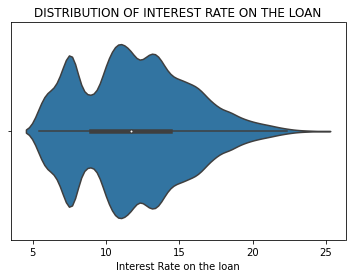

In [49]:
# Univariate Analysis

sns.violinplot(x = loan_df['int_rate'])
plt.title('DISTRIBUTION OF Interest Rate on the loan'.upper())
plt.xlabel('Interest Rate on the loan')
plt.show()

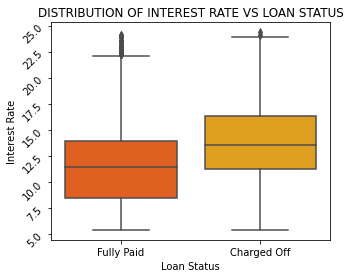

In [50]:
# Segmented Univariate Analysis

plt.figure(figsize = [5,4])
sns.boxplot(x = loan_df['loan_status'], y = loan_df['int_rate'], palette = 'autumn',orient = 'v')
plt.title('Distribution of Interest Rate VS Loan Status'.upper())
plt.yticks(rotation = 45)
plt.xlabel('Loan Status')
plt.ylabel('Interest Rate')
plt.show()

> **50% of defaulters have higher interest rate than 50% of non-defaulters** 

In [51]:
# Deriving new columns
#categorize continuous variables into buckets or binnning
loan_df['int_rate_cats'] = pd.qcut(loan_df['int_rate'], q = [0, 0.2, 0.4, 0.6, 0.8, 1], labels=['VL', 'L', 'M','H', 'VH'])

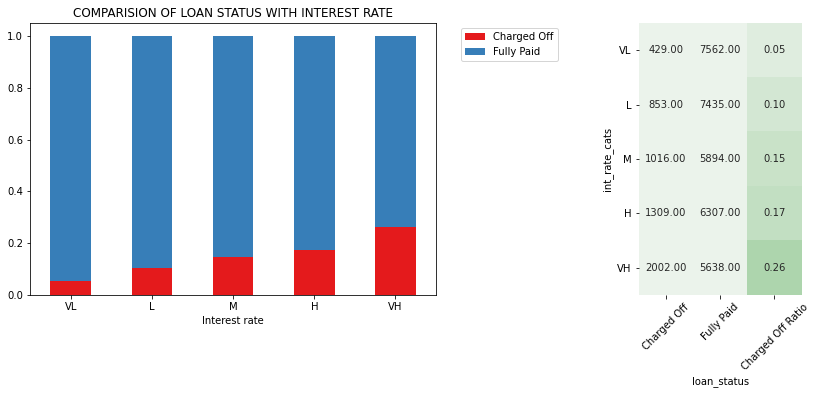

In [52]:
# Bivariate Analysis

fig, axes = plt.subplots(1, 2, figsize = [16,5])


int_rate = loan_df.groupby('int_rate_cats')['loan_status'].value_counts(normalize=True).unstack()
int_rate.plot(kind = 'bar', stacked = True, color=pal, ax=axes[0], linewidth=0.7)
axes[0].legend(bbox_to_anchor = (1.05,1))
axes[0].set_xlabel('Interest rate')
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=0)
axes[0].set_title('COMPARISION OF LOAN STATUS WITH INTEREST RATE')    


columns = ["int_rate_cats", 'loan_status']
cm = sns.light_palette("green", as_cmap=True)
contingency_matrix = pd.crosstab(loan_df[columns[0]], loan_df[columns[1]])#.style.background_gradient(cmap = cm)
contingency_matrix['Charged Off Ratio'] = contingency_matrix['Charged Off'] / (contingency_matrix['Charged Off'] + contingency_matrix['Fully Paid'])

ax = axes[1]
ax.set_aspect(1)
columns = ['Charged Off Ratio']
mymatrix = contingency_matrix.copy()
mask = mymatrix.columns.isin(columns)
mymatrix.loc[:, ~mask] = 0
res = sns.heatmap(mymatrix, annot=contingency_matrix, vmin=0, vmax=1, fmt='.2f',cmap=cm, cbar=False)
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45)
axes[1].set_yticklabels(axes[1].get_yticklabels(), rotation=0)

plt.savefig("crosstab_pandas.png")
plt.show()


## Inference:
> **From the above plots it is observed that, at higher interest rate, customers are more likely to be defaulted.**

### 4.3 Analysis on purpose

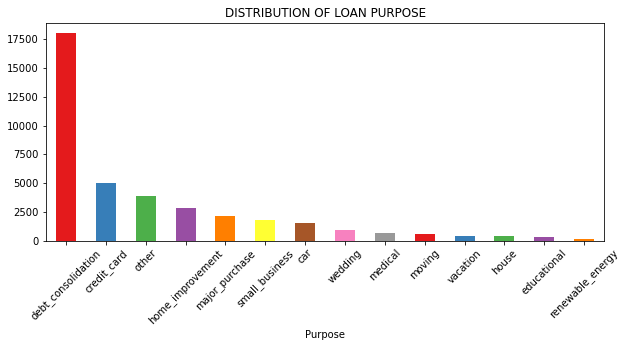

In [53]:
# Univariate Analysis

loan_df.purpose.value_counts().plot(kind = 'bar', color=pal, figsize = [10,4])
plt.title('DISTRIBUTION OF LOAN PURPOSE')
plt.xlabel('Purpose')
plt.xticks(rotation=45)
plt.show()

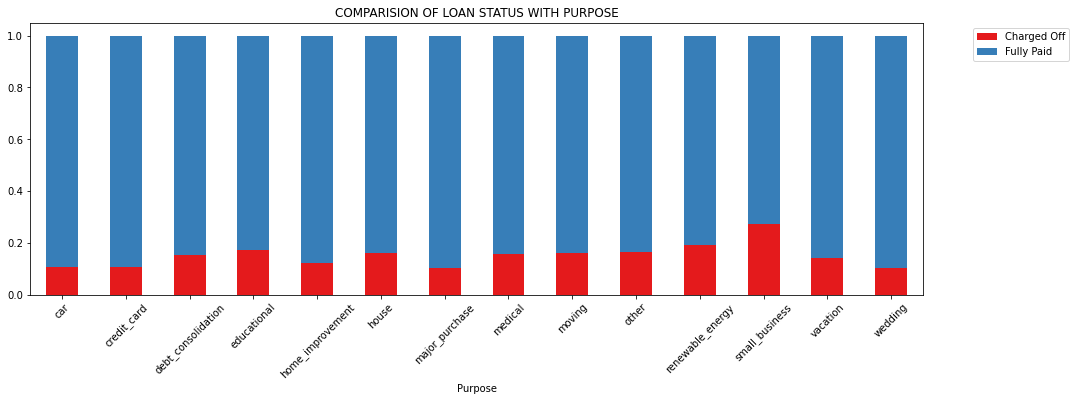

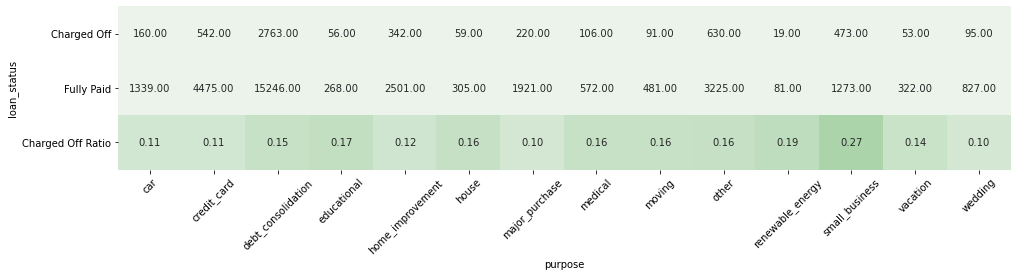

In [54]:
# Bivariate Analysis

purpose = loan_df.groupby('purpose')['loan_status'].value_counts(normalize=True).unstack()
purpose.plot(kind = 'bar', stacked = True,figsize = [16,5], color=pal)
plt.legend(bbox_to_anchor = (1.05,1))
plt.xticks(rotation = 45)
plt.xlabel('Purpose')
plt.title('COMPARISION OF LOAN STATUS WITH PURPOSE')
plt.show()


columns = ["purpose", 'loan_status']
cm = sns.light_palette("green", as_cmap=True)
contingency_matrix = pd.crosstab(loan_df[columns[0]], loan_df[columns[1]])#.style.background_gradient(cmap = cm)
contingency_matrix['Charged Off Ratio'] = contingency_matrix['Charged Off'] / (contingency_matrix['Charged Off'] + contingency_matrix['Fully Paid'])

plt.figure(figsize = (16,3))
columns = ['Charged Off Ratio']
mymatrix = contingency_matrix.copy()
mask = mymatrix.columns.isin(columns)
mymatrix.loc[:, ~mask] = 0
res = sns.heatmap(mymatrix.T, annot=contingency_matrix.T, vmin=0, vmax=1, fmt='.2f',cmap=cm, cbar=False)
plt.xticks( rotation=45)
plt.yticks( rotation=0)
plt.savefig("crosstab_pandas.png")
plt.show()

## Inference:
>- **The above plots shows that small_business owners are the highest defaulters, although the total count of debt consolidation is more.**
- **Also the loan applicants under renewable energy and educational are less in number, but they are defaulting more.**

### 4.4 Analysis on annual_inc

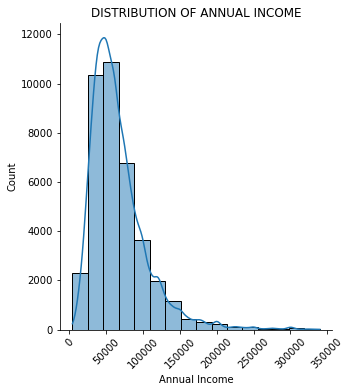

In [55]:
# Univariate Analysis

sns.displot(data = loan_df, x = 'annual_inc', bins = 16 , kde = True)
plt.title('Distribution of Annual Income'.upper())
plt.xticks(rotation = 45)
plt.xlabel('Annual Income')
plt.show()

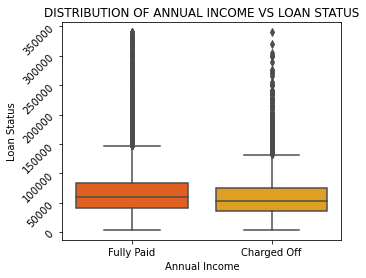

In [56]:
# Segmented Univariate Analysis

plt.figure(figsize = [5,4])
sns.boxplot(x = loan_df['loan_status'], y = loan_df['annual_inc'], palette = 'autumn',orient = 'v')
plt.title('Distribution of Annual Income VS Loan Status'.upper())
plt.yticks(rotation = 45)
plt.ylabel('Loan Status')
plt.xlabel('Annual Income')
plt.show()

In [57]:
# Deriving new columns
#categorize continuous variables into buckets or binnning
loan_df['annual_inc_cats'] = pd.cut(loan_df['annual_inc'], [0, 20000, 40000, 60000, 80000,1000000], labels=['0-20k', '20k-40k', '40k-60k', '60k-80k', '80k +'])

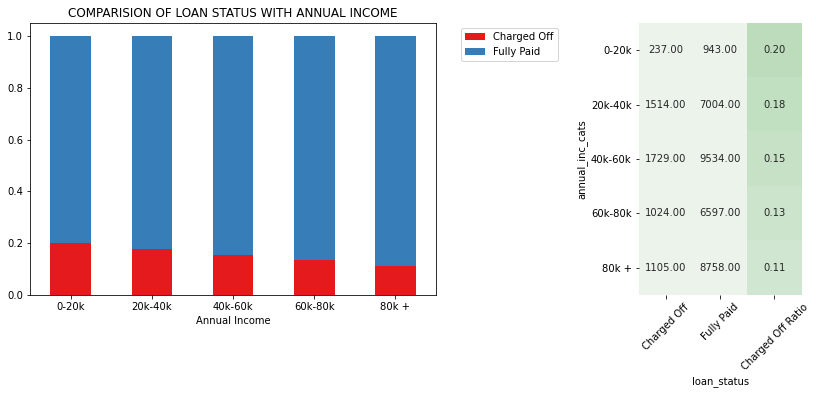

In [58]:
# Bivariate Analysis

fig, axes = plt.subplots(1, 2, figsize = [16,5])


int_rate = loan_df.groupby('annual_inc_cats')['loan_status'].value_counts(normalize=True).unstack()
int_rate.plot(kind = 'bar', stacked = True, color=pal, ax=axes[0], linewidth=0.7)
axes[0].legend(bbox_to_anchor = (1.05,1))
axes[0].set_xlabel('Annual Income')
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=0)
axes[0].set_title('COMPARISION OF LOAN STATUS WITH ANNUAL INCOME')    



columns = ["annual_inc_cats", 'loan_status']
cm = sns.light_palette("green", as_cmap=True)
contingency_matrix = pd.crosstab(loan_df[columns[0]], loan_df[columns[1]])#.style.background_gradient(cmap = cm)
contingency_matrix['Charged Off Ratio'] = contingency_matrix['Charged Off'] / (contingency_matrix['Charged Off'] + contingency_matrix['Fully Paid'])

ax = axes[1]
ax.set_aspect(1)
columns = ['Charged Off Ratio']
mymatrix = contingency_matrix.copy()
mask = mymatrix.columns.isin(columns)
mymatrix.loc[:, ~mask] = 0
res = sns.heatmap(mymatrix, annot=contingency_matrix, vmin=0, vmax=1, fmt='.2f',cmap=cm, cbar=False)
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45)
axes[1].set_yticklabels(axes[1].get_yticklabels(), rotation=0)

plt.savefig("crosstab_pandas.png")
plt.show()

## Inference:
> **From the above plot it can be observed that, applicants with higher income default less.**

### 4.5 Analysis on home_ownership

Text(0, 0.5, 'Home Ownership')

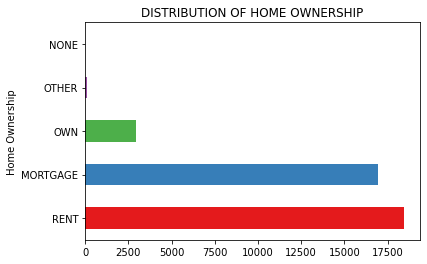

In [59]:
# Univariate Analysis

loan_df.home_ownership.value_counts().plot(kind = 'barh', color=pal)
plt.title('DISTRIBUTION OF HOME OWNERSHIP')
plt.ylabel('Home Ownership')

> **Most of the customers have mortgage home or are on rent**

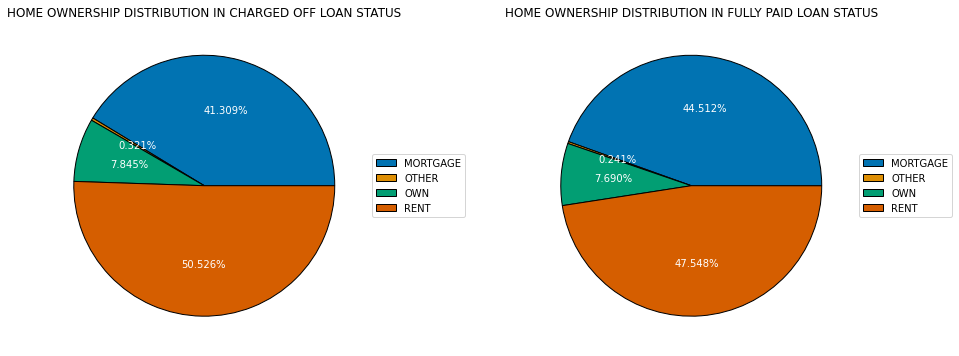

In [60]:
# Segmented Univariate Analysis

fig, axes = plt.subplots(1, 2, figsize = [16,6])

home_ownership = loan_df.groupby('loan_status')['home_ownership'].value_counts(normalize=True).unstack().T
home_ownership.dropna(axis=0, inplace=True)


data= home_ownership['Charged Off'].values
wedges, texts, autotexts = axes[0].pie(data, autopct=lambda pct: func(pct, data), 
                                       colors=pal4, wedgeprops = { 'linewidth' : 1, 'edgecolor' : 'black' },
                                  textprops=dict(color="w"))
axes[0].legend(wedges, home_ownership['Charged Off'].index.tolist(),
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))
axes[0].set_title('HOME OWNERSHIP DISTRIBUTION IN CHARGED OFF LOAN STATUS')



data2 = home_ownership['Fully Paid'].values
wedges, texts, autotexts = axes[1].pie(data2, autopct=lambda pct: func(pct, data2), 
                                       colors=pal4, wedgeprops = { 'linewidth' : 1, 'edgecolor' : 'black' },
                                  textprops=dict(color="w"))
axes[1].legend(wedges, home_ownership['Fully Paid'].index.tolist(),
          loc="center left",          bbox_to_anchor=(1, 0, 0.5, 1))

axes[1].set_title('HOME OWNERSHIP DISTRIBUTION IN FULLY PAID LOAN STATUS')
plt.show()

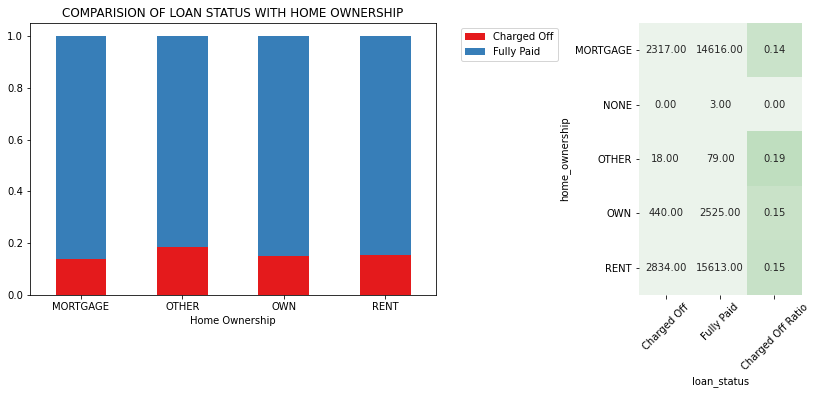

In [61]:
# Bivariate Analysis

fig, axes = plt.subplots(1, 2, figsize = [16,5])


loan_df.groupby('home_ownership')['loan_status'].value_counts(normalize=True).unstack().dropna(axis=0).plot(kind = 'bar', stacked = True, color=pal, ax=axes[0], linewidth=0.7)
axes[0].legend(bbox_to_anchor = (1.05,1))
axes[0].set_xlabel('Home Ownership')
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=0)
axes[0].set_title('COMPARISION OF LOAN STATUS WITH HOME OWNERSHIP')    


columns = ["home_ownership", 'loan_status']
cm = sns.light_palette("green", as_cmap=True)
contingency_matrix = pd.crosstab(loan_df[columns[0]], loan_df[columns[1]])#.style.background_gradient(cmap = cm)
contingency_matrix['Charged Off Ratio'] = contingency_matrix['Charged Off'] / (contingency_matrix['Charged Off'] + contingency_matrix['Fully Paid'])

ax = axes[1]
ax.set_aspect(1)
columns = ['Charged Off Ratio']
mymatrix = contingency_matrix.copy()
mask = mymatrix.columns.isin(columns)
mymatrix.loc[:, ~mask] = 0
res = sns.heatmap(mymatrix, annot=contingency_matrix, vmin=0, vmax=1, fmt='.2f',cmap=cm, cbar=False)
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45)
axes[1].set_yticklabels(axes[1].get_yticklabels(), rotation=0)

plt.savefig("crosstab_pandas.png")
plt.show()

## Inference:
> **From the above plot, we can see that, there is not much variation in ratio of defaulters with respect to non-defaulters. Thus, the house ownership parameter doesn't seems to be a good driving factor.**

### 4.6 Analysis on grade

Text(0, 0.5, 'Grade')

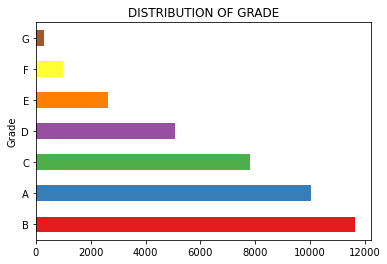

In [62]:
# Univariate Analysis

loan_df.grade.value_counts().plot(kind = 'barh', color=pal)
plt.title('DISTRIBUTION OF GRADE')
plt.ylabel('Grade')

> **Total count of customers with grade B is highest**

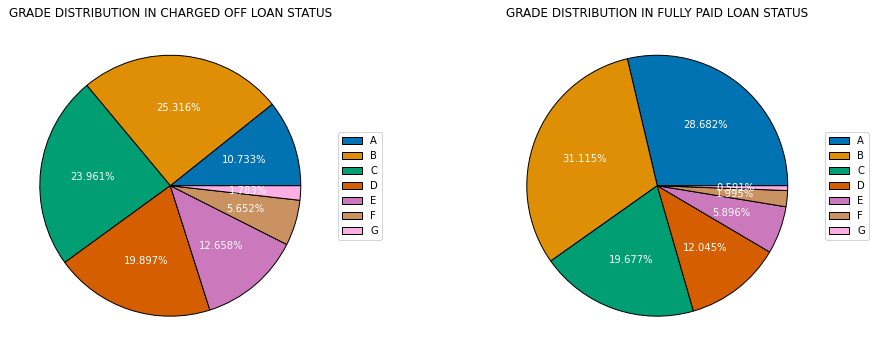

In [63]:
# Segmented Univariate Analysis

fig, axes = plt.subplots(1, 2, figsize = [16,6])

grade = loan_df.groupby('loan_status')['grade'].value_counts(normalize=True).unstack().T


data= grade['Charged Off'].values
wedges, texts, autotexts = axes[0].pie(data, autopct=lambda pct: func(pct, data), 
                                       colors=pal4, wedgeprops = { 'linewidth' : 1, 'edgecolor' : 'black' },
                                  textprops=dict(color="w"))
axes[0].legend(wedges, grade['Charged Off'].index.tolist(),
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))
axes[0].set_title('GRADE DISTRIBUTION IN CHARGED OFF LOAN STATUS')


data2 = grade['Fully Paid'].values
wedges, texts, autotexts = axes[1].pie(data2, autopct=lambda pct: func(pct, data2), 
                                       colors=pal4, wedgeprops = { 'linewidth' : 1, 'edgecolor' : 'black' },
                                  textprops=dict(color="w"))
axes[1].legend(wedges, grade['Fully Paid'].index.tolist(),
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

axes[1].set_title('GRADE DISTRIBUTION IN FULLY PAID LOAN STATUS')
plt.show()

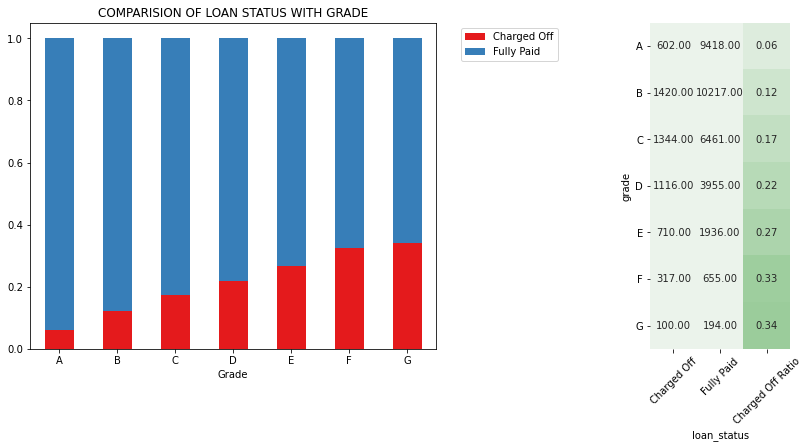

In [64]:
# Bivariate Analysis

fig, axes = plt.subplots(1, 2, figsize = [16,6])


loan_df.groupby('grade')['loan_status'].value_counts(normalize=True).unstack().plot(kind = 'bar', stacked = True, color=pal, ax=axes[0], linewidth=0.7)
axes[0].legend(bbox_to_anchor = (1.05,1))
axes[0].set_xlabel('Grade')
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=0)
axes[0].set_title('COMPARISION OF LOAN STATUS WITH GRADE')    


columns = ["grade", 'loan_status']
cm = sns.light_palette("green", as_cmap=True)
contingency_matrix = pd.crosstab(loan_df[columns[0]], loan_df[columns[1]])#.style.background_gradient(cmap = cm)
contingency_matrix['Charged Off Ratio'] = contingency_matrix['Charged Off'] / (contingency_matrix['Charged Off'] + contingency_matrix['Fully Paid'])

ax = axes[1]
ax.set_aspect(1)
columns = ['Charged Off Ratio']
mymatrix = contingency_matrix.copy()
mask = mymatrix.columns.isin(columns)
mymatrix.loc[:, ~mask] = 0
res = sns.heatmap(mymatrix, annot=contingency_matrix, vmin=0, vmax=1, fmt='.2f',cmap=cm, cbar=False)
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45)
axes[1].set_yticklabels(axes[1].get_yticklabels(), rotation=0)

plt.savefig("crosstab_pandas.png")
plt.show()

## Inference:
>- **From the above plots, it can be seen that the rate of defaulters is least for grade A and highest for grade G.**
- **The rate of defaulters increases from grade A to grade G**
- **Grade G has highest rate of defaulters**  

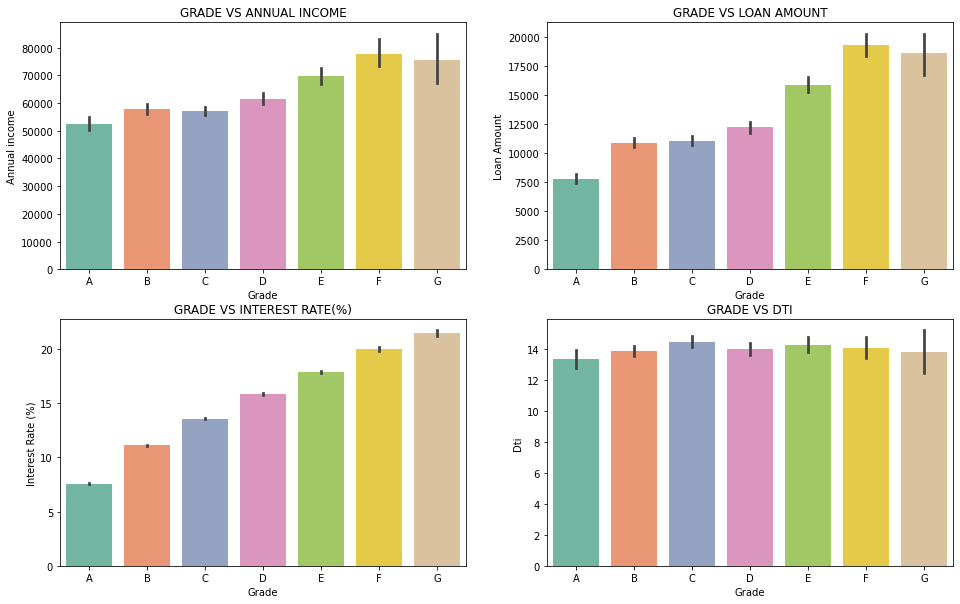

In [65]:
# Bivariate Analysis

fig, axes = plt.subplots(2, 2, figsize = [16,10])
sns.barplot(x='grade', y='annual_inc', data=loan_charged_off_df, palette=pal2, ax=axes[0][0], order="ABCDEFG")
axes[0][0].set_ylabel('Annual income')
axes[0][0].set_xlabel('Grade')
axes[0][0].set_title('Grade vs Annual income'.upper())

sns.barplot(x='grade', y='loan_amnt', data=loan_charged_off_df, palette=pal2, ax=axes[0][1], order="ABCDEFG")
axes[0][1].set_xlabel('Grade')
axes[0][1].set_ylabel('Loan Amount')
axes[0][1].set_title('Grade vs Loan Amount'.upper())

sns.barplot(x='grade', y='int_rate', data=loan_charged_off_df, palette=pal2, ax=axes[1][0], order="ABCDEFG")
axes[1][0].set_xlabel('Grade')
axes[1][0].set_ylabel('Interest Rate (%)')
axes[1][0].set_title('Grade vs Interest Rate(%)'.upper())

sns.barplot(x='grade', y='dti', data=loan_charged_off_df, palette=pal2, ax=axes[1][1], order="ABCDEFG")
axes[1][1].set_xlabel('Grade')
axes[1][1].set_ylabel('Dti')
axes[1][1].set_title('Grade vs Dti'.upper())
plt.show()


## Inference:
>**For Grade G, the highest possibilty of default is when:-**
- **Annual Income is between 60k to 80k**
- **Loan Amount is between 17500 to 20000**
- **Interest Rate is above 20%**

### 4.7 Analysis on sub-grade

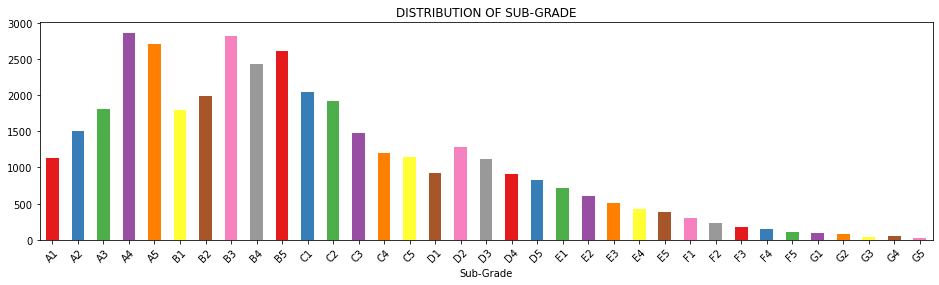

In [66]:
# Univariate Analysis

loan_df.sub_grade.value_counts().sort_index().plot(kind = 'bar', color=pal, figsize = [16,4])
plt.title('DISTRIBUTION OF SUB-GRADE')
plt.xlabel('Sub-Grade')
plt.xticks(rotation=45)
plt.show()

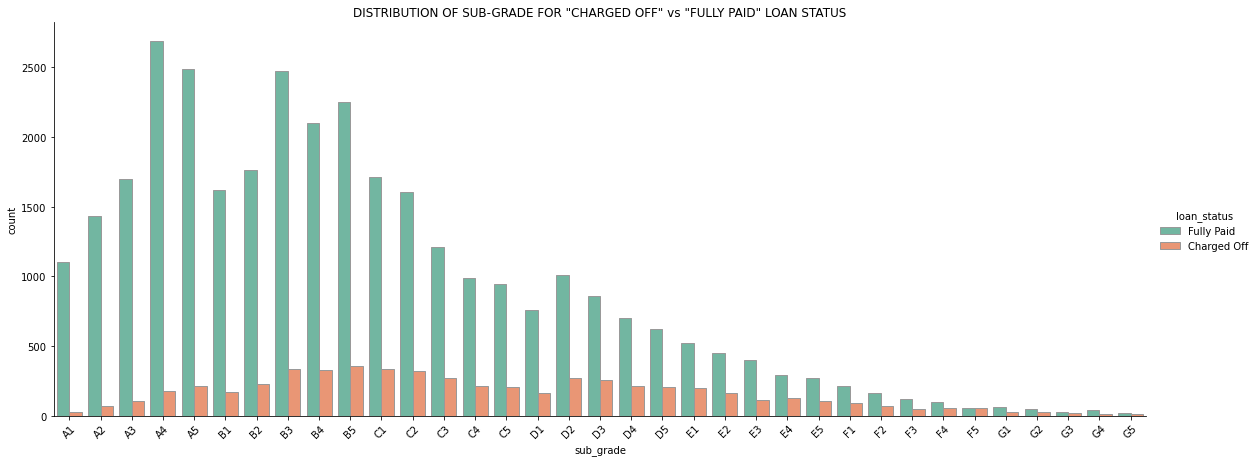

In [67]:
# Segmented Univariate Analysis

import numpy as np
import matplotlib.pyplot as plt

sns.catplot(x="sub_grade", hue="loan_status", kind="count",
            palette=pal2, edgecolor=".6",
            data=loan_df.sort_values(by='sub_grade'), height=6, aspect=16/6);
plt.title('DISTRIBUTION OF SUB-GRADE FOR "CHARGED OFF" vs "FULLY PAID" LOAN STATUS')
plt.xticks(rotation = 45)
plt.show()

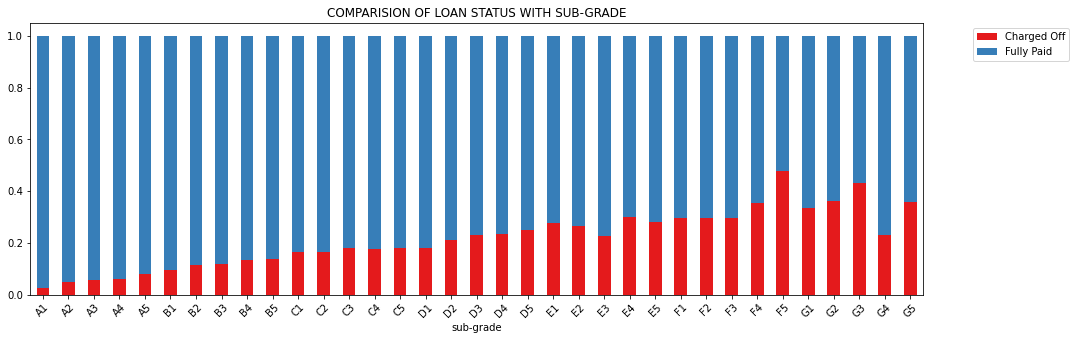

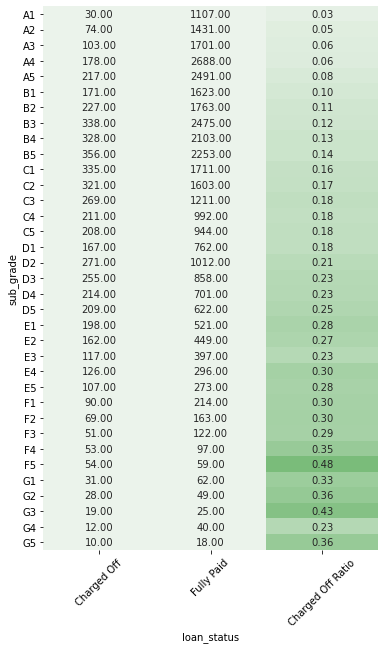

In [68]:
# Bivariate Analysis

loan_df.groupby('sub_grade')['loan_status'].value_counts(normalize=True).unstack().plot(kind = 'bar', stacked = True,figsize = [16,5], color=pal)
plt.legend(bbox_to_anchor = (1.05,1))
plt.xticks(rotation = 45)
plt.xlabel('sub-grade')
plt.title('COMPARISION OF LOAN STATUS WITH SUB-GRADE')
plt.show()

columns = ["sub_grade", 'loan_status']
cm = sns.light_palette("green", as_cmap=True)
contingency_matrix = pd.crosstab(loan_df[columns[0]], loan_df[columns[1]])
contingency_matrix['Charged Off Ratio'] = contingency_matrix['Charged Off'] / (contingency_matrix['Charged Off'] + contingency_matrix['Fully Paid'])

plt.figure(figsize = (6,10))
columns = ['Charged Off Ratio']
mymatrix = contingency_matrix.copy()
mask = mymatrix.columns.isin(columns)
mymatrix.loc[:, ~mask] = 0
res = sns.heatmap(mymatrix, annot=contingency_matrix, vmin=0, vmax=1, fmt='.2f',cmap=cm, cbar=False)
plt.xticks( rotation=45)
plt.yticks( rotation=0)
plt.savefig("crosstab_pandas.png")
plt.show()

## Inference:
>- **From the above plots, it is observed that the rate of defaulters gradually increase from lower sub-grades to higher sub-grades.**
- **The customers with higher sub_grades are ‘risky’ applicants, especially with F5, G5, G3, G2 sub-grades.**

### 4.8 Analysis on term

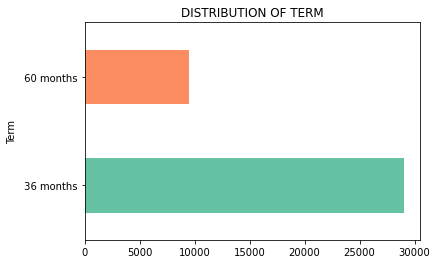

In [69]:
# Univariate Analysis

loan_df.term.value_counts().plot(kind = 'barh', color=pal2)
plt.title('DISTRIBUTION OF TERM')
plt.ylabel('Term')
plt.show()

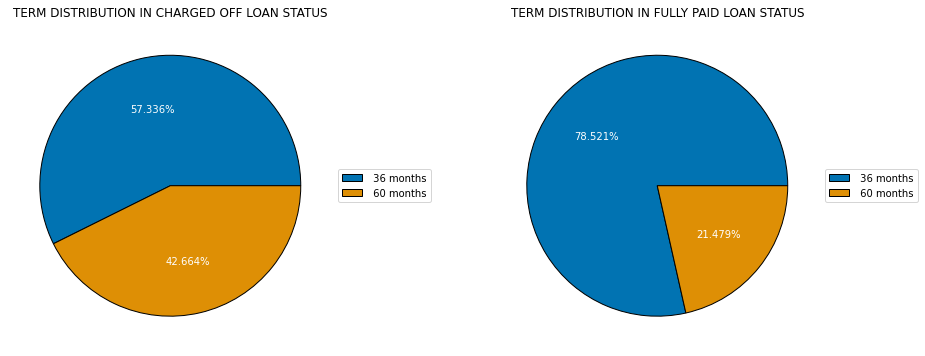

In [70]:
# Segmented Univariate Analysis

fig, axes = plt.subplots(1, 2, figsize = [16,6])

term = loan_df.groupby('loan_status')['term'].value_counts(normalize=True).unstack().T


data= term['Charged Off'].values
wedges, texts, autotexts = axes[0].pie(data, autopct=lambda pct: func(pct, data), 
                                       colors=pal4, wedgeprops = { 'linewidth' : 1, 'edgecolor' : 'black' },
                                  textprops=dict(color="w"))
axes[0].legend(wedges, term['Charged Off'].index.tolist(),
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))
axes[0].set_title('TERM DISTRIBUTION IN CHARGED OFF LOAN STATUS')


data2 = term['Fully Paid'].values
wedges, texts, autotexts = axes[1].pie(data2, autopct=lambda pct: func(pct, data2), 
                                       colors=pal4, wedgeprops = { 'linewidth' : 1, 'edgecolor' : 'black' },
                                  textprops=dict(color="w"))
axes[1].legend(wedges, term['Fully Paid'].index.tolist(),
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

axes[1].set_title('TERM DISTRIBUTION IN FULLY PAID LOAN STATUS')
plt.show()

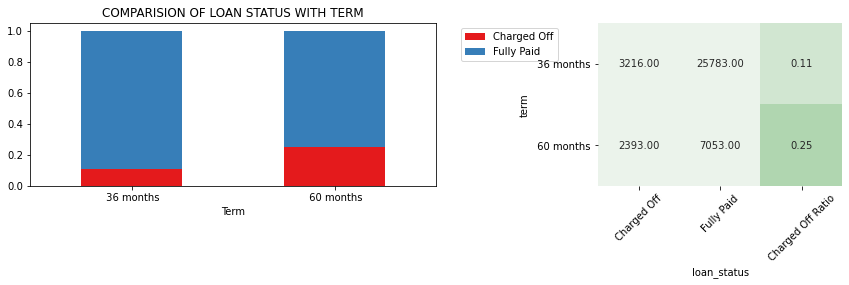

In [71]:
# Bivariate Analysis

fig, axes = plt.subplots(1, 2, figsize = [16,3])


loan_df.groupby('term')['loan_status'].value_counts(normalize=True).unstack().plot(kind = 'bar', stacked = True, color=pal, ax=axes[0], linewidth=0.7)
axes[0].legend(bbox_to_anchor = (1.05,1))
axes[0].set_xlabel('Term')
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=0)
axes[0].set_title('COMPARISION OF LOAN STATUS WITH TERM')    

columns = ["term", 'loan_status']
cm = sns.light_palette("green", as_cmap=True)
contingency_matrix = pd.crosstab(loan_df[columns[0]], loan_df[columns[1]])
contingency_matrix['Charged Off Ratio'] = contingency_matrix['Charged Off'] / (contingency_matrix['Charged Off'] + contingency_matrix['Fully Paid'])

ax = axes[1]
ax.set_aspect(1)
columns = ['Charged Off Ratio']
mymatrix = contingency_matrix.copy()
mask = mymatrix.columns.isin(columns)
mymatrix.loc[:, ~mask] = 0
res = sns.heatmap(mymatrix, annot=contingency_matrix, vmin=0, vmax=1, fmt='.2f',cmap=cm, cbar=False)
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45)
axes[1].set_yticklabels(axes[1].get_yticklabels(), rotation=0)

plt.savefig("crosstab_pandas.png")
plt.show()

## Inference:
>- **From the above plots, it is observed that although the total count of customers is higher for the term period of 36 months, the rate of defaulters is more in case of 60 months term.**
- **Thus, the Term is a very good driving factor**

### 4.9 Analysis on dti

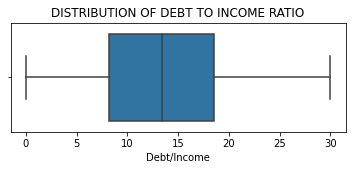

In [72]:
# Univariate Analysis

plt.figure(figsize = [6,2])
sns.boxplot(x = loan_df['dti'])
plt.title('Distribution of debt to income ratio'.upper())
plt.xlabel('Debt/Income')
plt.show()

In [73]:
print(np.percentile(loan_df['dti'], 25), '-', np.percentile(loan_df['dti'], 75))

8.17 - 18.57


> **50% of customers have interest rate between 8.17% to 18.57%**

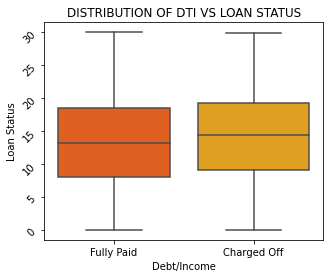

In [74]:
# Segmented Univariate Analysis

plt.figure(figsize = [5,4])
sns.boxplot(x = loan_df['loan_status'], y = loan_df['dti'], palette = 'autumn',orient = 'v')
plt.title('Distribution of dti VS Loan Status'.upper())
plt.yticks(rotation = 45)
plt.ylabel('Loan Status')
plt.xlabel('Debt/Income')
plt.show()

In [75]:
# Deriving new columns
#categorizing continuous variables into buckets or binnning
loan_df['dti_cats'] = pd.qcut(loan_df['dti'], q = [0, 0.2, 0.4, 0.6, 0.8, 1], labels=['VL', 'L', 'M','H', 'VH'])

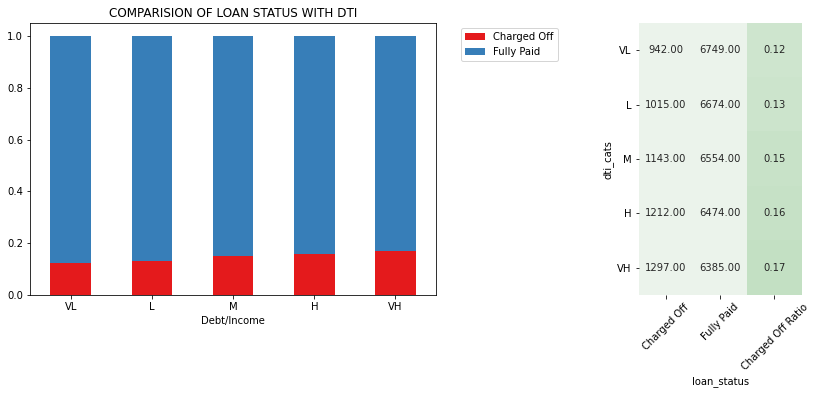

In [76]:
# Bivariate Analysis

fig, axes = plt.subplots(1, 2, figsize = [16,5])

loan_df.groupby('dti_cats')['loan_status'].value_counts(normalize=True).unstack().plot(kind = 'bar', stacked = True, color=pal, ax=axes[0], linewidth=0.7)
axes[0].legend(bbox_to_anchor = (1.05,1))
axes[0].set_xlabel('Debt/Income')
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=0)
axes[0].set_title('COMPARISION OF LOAN STATUS WITH DTI')    


columns = ["dti_cats", 'loan_status']
cm = sns.light_palette("green", as_cmap=True)
contingency_matrix = pd.crosstab(loan_df[columns[0]], loan_df[columns[1]])
contingency_matrix['Charged Off Ratio'] = contingency_matrix['Charged Off'] / (contingency_matrix['Charged Off'] + contingency_matrix['Fully Paid'])

ax = axes[1]
ax.set_aspect(1)
columns = ['Charged Off Ratio']
mymatrix = contingency_matrix.copy()
mask = mymatrix.columns.isin(columns)
mymatrix.loc[:, ~mask] = 0
res = sns.heatmap(mymatrix, annot=contingency_matrix, vmin=0, vmax=1, fmt='.2f',cmap=cm, cbar=False)
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45)
axes[1].set_yticklabels(axes[1].get_yticklabels(), rotation=0)

plt.savefig("crosstab_pandas.png")
plt.show()

## Inference:
>**From the above plots, it is observed that the rate of defaulters gradually increase from lower debt-to-income ratio to higher debt-to-income ratio.**

### 4.10 Analysis on verification_status

Text(0, 0.5, 'Verification Status')

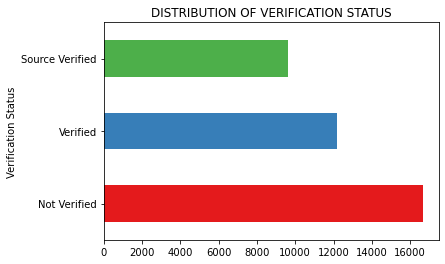

In [77]:
# Univariate Analysis

loan_df.verification_status.value_counts().plot(kind = 'barh', color=pal)
plt.title('DISTRIBUTION OF VERIFICATION STATUS')
plt.ylabel('Verification Status')

>**Maximum number of loans are not verified**

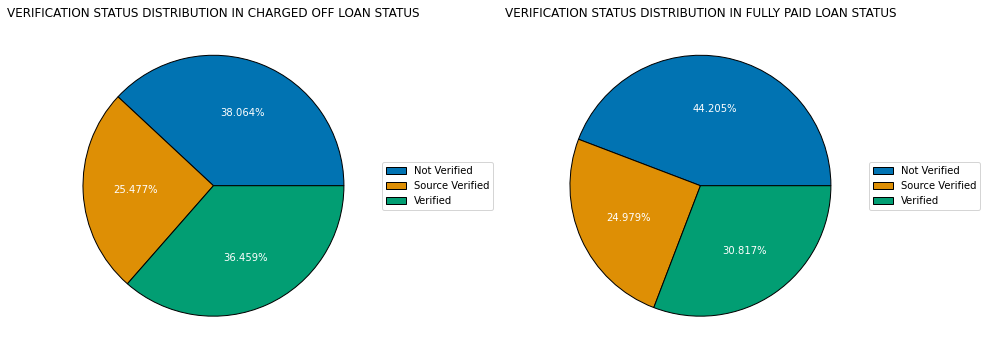

In [78]:
# Segmented Univariate Analysis

fig, axes = plt.subplots(1, 2, figsize = [16,6])

verification_status = loan_df.groupby('loan_status')['verification_status'].value_counts(normalize=True).unstack().T


data= verification_status['Charged Off'].values
wedges, texts, autotexts = axes[0].pie(data, autopct=lambda pct: func(pct, data), 
                                       colors=pal4, wedgeprops = { 'linewidth' : 1, 'edgecolor' : 'black' },
                                  textprops=dict(color="w"))
axes[0].legend(wedges, verification_status['Charged Off'].index.tolist(),
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

axes[0].set_title('VERIFICATION STATUS DISTRIBUTION IN CHARGED OFF LOAN STATUS')


data2 = verification_status['Fully Paid'].values
wedges, texts, autotexts = axes[1].pie(data2, autopct=lambda pct: func(pct, data2), 
                                       colors=pal4, wedgeprops = { 'linewidth' : 1, 'edgecolor' : 'black' },
                                  textprops=dict(color="w"))
axes[1].legend(wedges, verification_status['Fully Paid'].index.tolist(),
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))
axes[1].set_title('VERIFICATION STATUS DISTRIBUTION IN FULLY PAID LOAN STATUS')
plt.show()

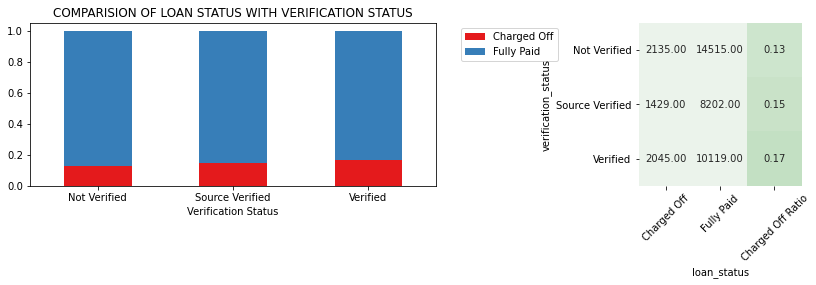

In [79]:
# Bivariate Analysis

fig, axes = plt.subplots(1, 2, figsize = [16,3])

loan_df.groupby('verification_status')['loan_status'].value_counts(normalize=True).unstack().plot(kind = 'bar', stacked = True, color=pal, ax=axes[0], linewidth=0.7)
axes[0].legend(bbox_to_anchor = (1.05,1))
axes[0].set_xlabel('Verification Status')
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=0)
axes[0].set_title('COMPARISION OF LOAN STATUS WITH VERIFICATION STATUS')    

columns = ["verification_status", 'loan_status']
cm = sns.light_palette("green", as_cmap=True)
contingency_matrix = pd.crosstab(loan_df[columns[0]], loan_df[columns[1]])
contingency_matrix['Charged Off Ratio'] = contingency_matrix['Charged Off'] / (contingency_matrix['Charged Off'] + contingency_matrix['Fully Paid'])

ax = axes[1]
ax.set_aspect(1)
columns = ['Charged Off Ratio']
mymatrix = contingency_matrix.copy()
mask = mymatrix.columns.isin(columns)
mymatrix.loc[:, ~mask] = 0
res = sns.heatmap(mymatrix, annot=contingency_matrix, vmin=0, vmax=1, fmt='.2f',cmap=cm, cbar=False)
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45)
axes[1].set_yticklabels(axes[1].get_yticklabels(), rotation=0)

plt.savefig("crosstab_pandas.png")
plt.show()

## Inference:
> **From the above plot, it seems there isn't much variation in ratio of defaulters with respect to non-defaulters. Thus, the verification status parameter is not found to be a good driving factor.**

### 4.11 Analysis on addr_state

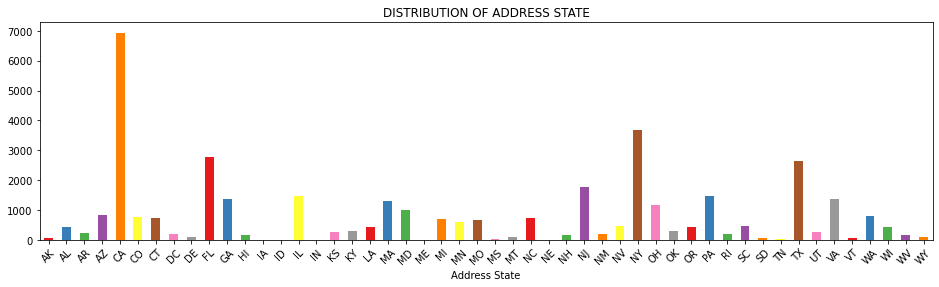

In [80]:
# Univariate Analysis

loan_df.addr_state.value_counts().sort_index().plot(kind = 'bar', color=pal, figsize = [16,4])
plt.title('DISTRIBUTION OF ADDRESS STATE')
plt.xlabel('Address State')
plt.xticks(rotation=45)
plt.show()

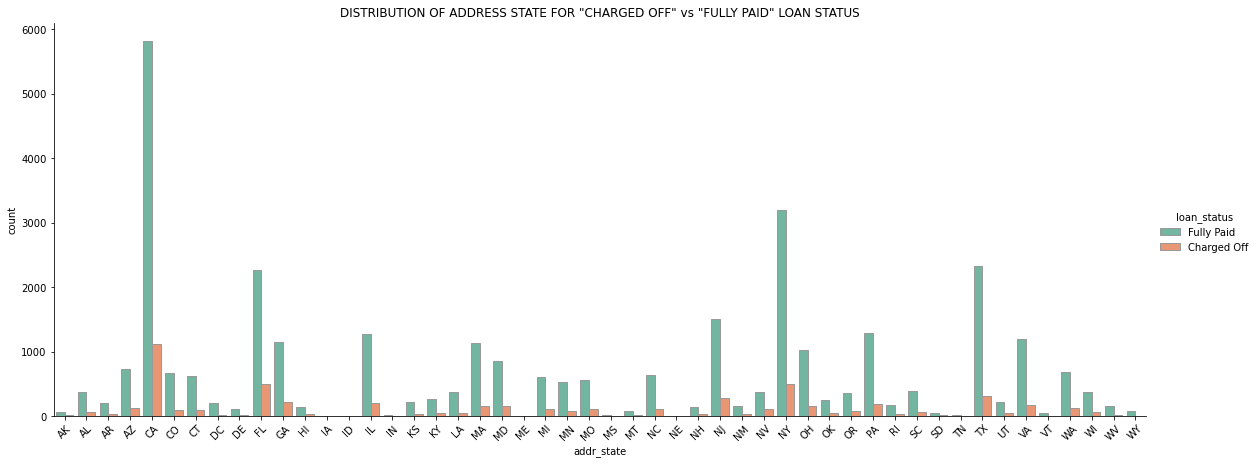

In [81]:
# Segmented Univariate Analysis

import numpy as np
import matplotlib.pyplot as plt

sns.catplot(x="addr_state", hue="loan_status", kind="count",
            palette=pal2, edgecolor=".6",
            data=loan_df.sort_values(by='addr_state'), height=6, aspect=16/6);
plt.title('DISTRIBUTION OF ADDRESS STATE FOR "CHARGED OFF" vs "FULLY PAID" LOAN STATUS')
plt.xticks(rotation = 45)
plt.show()

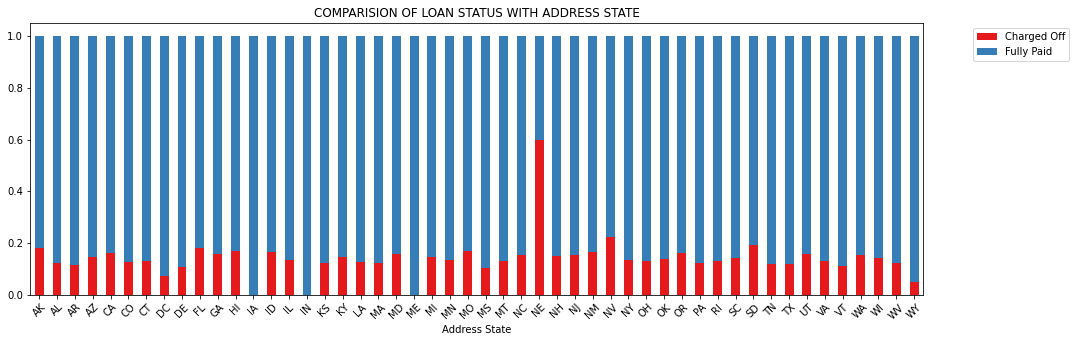

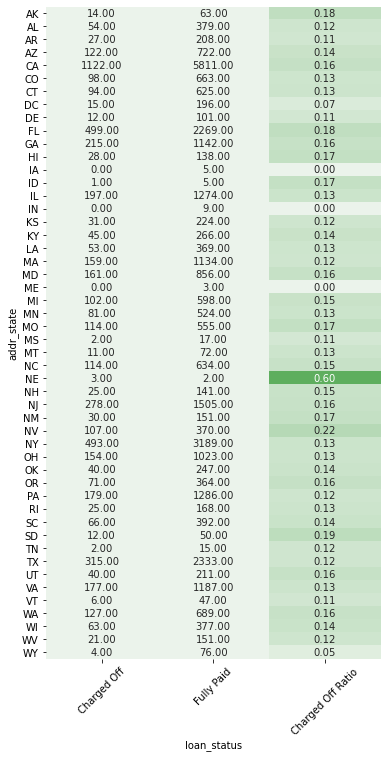

In [82]:
# Bivariate Analysis

loan_df.groupby('addr_state')['loan_status'].value_counts(normalize=True).unstack().plot(kind = 'bar', stacked = True,figsize = [16,5], color=pal)
plt.legend(bbox_to_anchor = (1.05,1))
plt.xticks(rotation = 45)
plt.xlabel('Address State')
plt.title('COMPARISION OF LOAN STATUS WITH ADDRESS STATE')
plt.show()

columns = ["addr_state", 'loan_status']
cm = sns.light_palette("green", as_cmap=True)
contingency_matrix = pd.crosstab(loan_df[columns[0]], loan_df[columns[1]])
contingency_matrix['Charged Off Ratio'] = contingency_matrix['Charged Off'] / (contingency_matrix['Charged Off'] + contingency_matrix['Fully Paid'])

plt.figure(figsize = (6,12))
columns = ['Charged Off Ratio']
mymatrix = contingency_matrix.copy()
mask = mymatrix.columns.isin(columns)
mymatrix.loc[:, ~mask] = 0
res = sns.heatmap(mymatrix, annot=contingency_matrix, vmin=0, vmax=1, fmt='.2f',cmap=cm, cbar=False)
plt.xticks( rotation=45)
plt.yticks( rotation=0)
plt.savefig("crosstab_pandas.png")
plt.show()

## Inference:
>- **From the above plot, it can be understood that if the applicant is from the NE state then there is higher possibility of getting default.**
- **The top 3 states, having highest chances of getting default customers are NE, NV and SD**

### 4.12 Analysis on issue_month

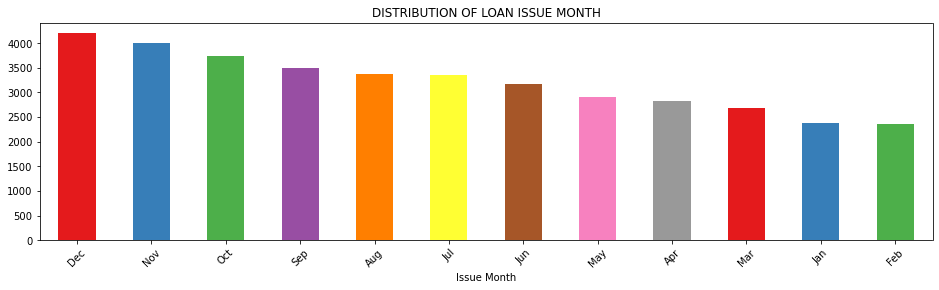

In [83]:
# Univariate Analysis

loan_df.issue_month.value_counts().plot(kind = 'bar', color=pal, figsize = [16,4])
plt.title('DISTRIBUTION OF LOAN ISSUE MONTH')
plt.xlabel('Issue Month')
plt.xticks(rotation=45)
plt.show()

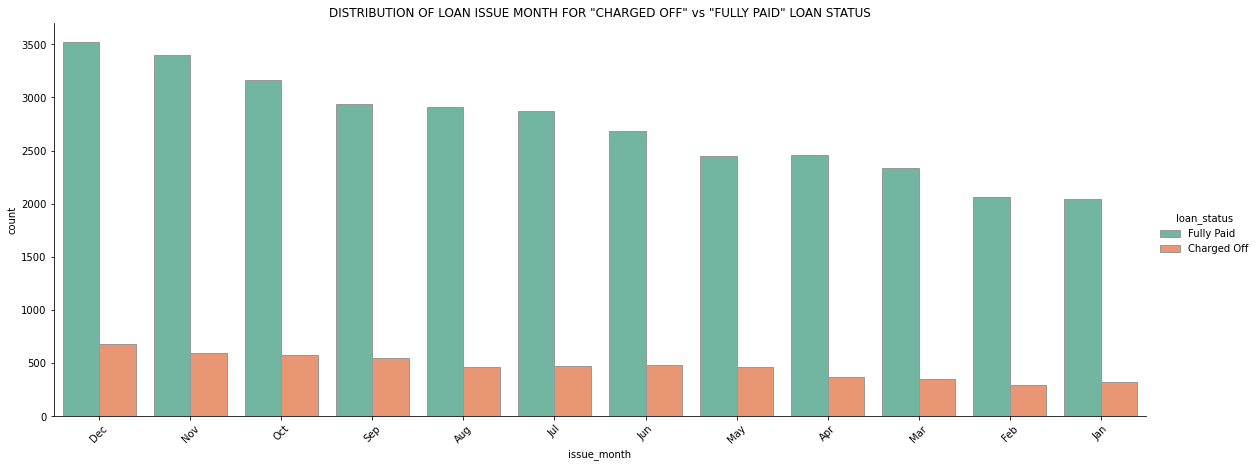

In [84]:
# Segmented Univariate Analysis

import numpy as np
import matplotlib.pyplot as plt

sns.catplot(x="issue_month", hue="loan_status", kind="count",
            palette=pal2, edgecolor=".6",
            data=loan_df, height=6, aspect=16/6);
plt.title('DISTRIBUTION OF LOAN ISSUE MONTH FOR "CHARGED OFF" vs "FULLY PAID" LOAN STATUS')
plt.xticks(rotation = 45)
plt.show()

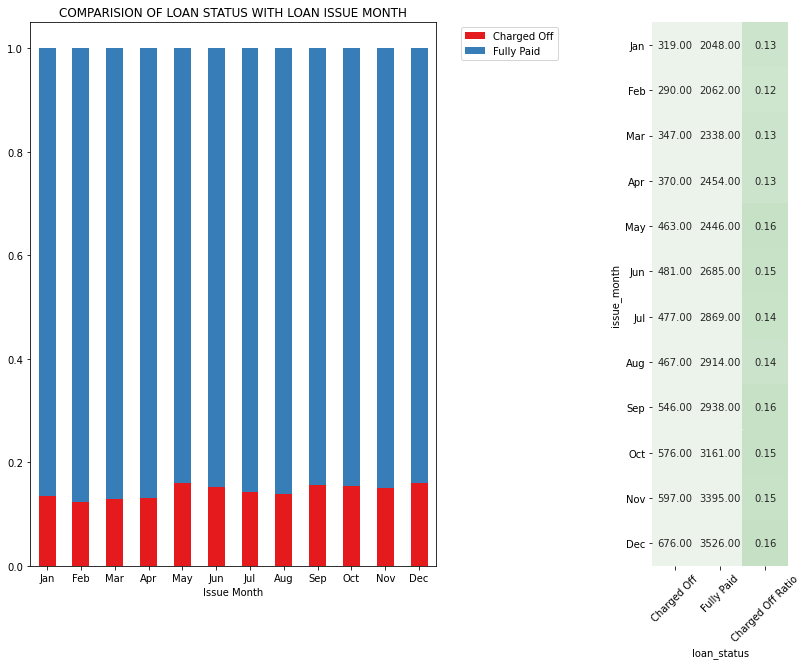

In [85]:
# Bivariate Analysis

fig, axes = plt.subplots(1, 2, figsize = [16,10])

new_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

loan_df.groupby('issue_month')['loan_status'].value_counts(normalize=True).unstack().reindex(new_order, axis=0).plot(kind = 'bar', stacked = True, color=pal, ax=axes[0], linewidth=0.7)
axes[0].legend(bbox_to_anchor = (1.05,1))
axes[0].set_xlabel('Issue Month')
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=0)
axes[0].set_title('COMPARISION OF LOAN STATUS WITH LOAN ISSUE MONTH')    

columns = ["issue_month", 'loan_status']
cm = sns.light_palette("green", as_cmap=True)
contingency_matrix = pd.crosstab(loan_df[columns[0]], loan_df[columns[1]]).reindex(new_order, axis=0) #.style.background_gradient(cmap = cm)
contingency_matrix['Charged Off Ratio'] = contingency_matrix['Charged Off'] / (contingency_matrix['Charged Off'] + contingency_matrix['Fully Paid'])

ax = axes[1]
ax.set_aspect(1)
columns = ['Charged Off Ratio']
mymatrix = contingency_matrix.copy()
mask = mymatrix.columns.isin(columns)
mymatrix.loc[:, ~mask] = 0
res = sns.heatmap(mymatrix, annot=contingency_matrix, vmin=0, vmax=1, fmt='.2f',cmap=cm, cbar=False)
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45)
axes[1].set_yticklabels(axes[1].get_yticklabels(), rotation=0)

plt.savefig("crosstab_pandas.png")
plt.show()

## Inference:
>**From the above plots, we can say that there is more possibilty of defaulters in 1st quater of the year compared to 3rd and 4th quaters.**

### 4.13 Analysis on issue_year

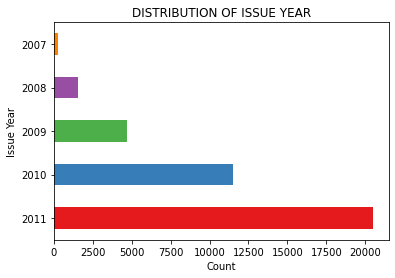

In [86]:
# Univariate Analysis

loan_df.issue_year.value_counts().plot(kind = 'barh', color=pal)
plt.ylabel('Issue Year')
plt.xlabel('Count')
plt.title('DISTRIBUTION OF ISSUE YEAR')
plt.show()

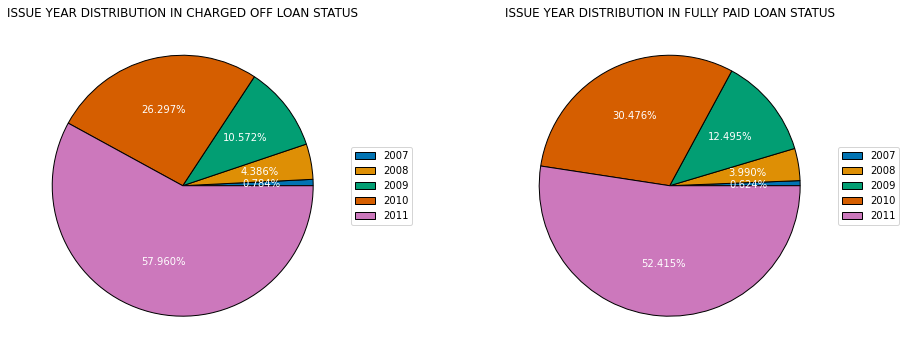

In [87]:
# Segmented Univariate Analysis

fig, axes = plt.subplots(1, 2, figsize = [16,6])

issue_year = loan_df.groupby('loan_status')['issue_year'].value_counts(normalize=True).unstack().T


data= issue_year['Charged Off'].values
wedges, texts, autotexts = axes[0].pie(data, autopct=lambda pct: func(pct, data), 
                                       colors=pal4, wedgeprops = { 'linewidth' : 1, 'edgecolor' : 'black' },
                                  textprops=dict(color="w"))
axes[0].legend(wedges, issue_year['Charged Off'].index.tolist(),
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))
axes[0].set_title('ISSUE YEAR DISTRIBUTION IN CHARGED OFF LOAN STATUS')



data2 = issue_year['Fully Paid'].values
wedges, texts, autotexts = axes[1].pie(data2, autopct=lambda pct: func(pct, data2), 
                                       colors=pal4, wedgeprops = { 'linewidth' : 1, 'edgecolor' : 'black' },
                                  textprops=dict(color="w"))
axes[1].legend(wedges, issue_year['Fully Paid'].index.tolist(),
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))
axes[1].set_title('ISSUE YEAR DISTRIBUTION IN FULLY PAID LOAN STATUS')
plt.show()

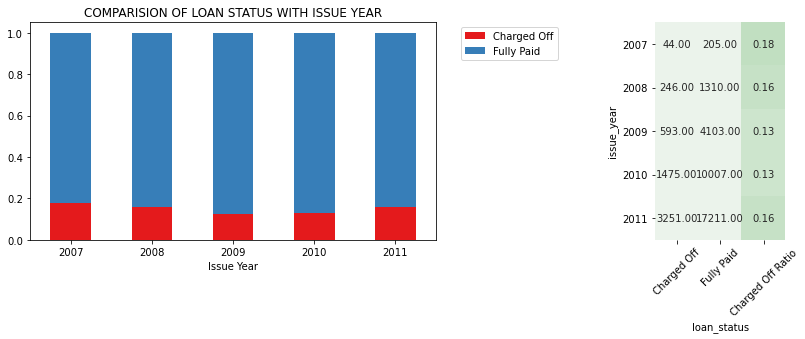

In [88]:
# Bivariate Analysis

fig, axes = plt.subplots(1, 2, figsize = [16,4])


loan_df.groupby('issue_year')['loan_status'].value_counts(normalize=True).unstack().plot(kind = 'bar', stacked = True, color=pal, ax=axes[0], linewidth=0.7)
axes[0].legend(bbox_to_anchor = (1.05,1))
axes[0].set_xlabel('Issue Year')
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=0)
axes[0].set_title('COMPARISION OF LOAN STATUS WITH ISSUE YEAR')    

columns = ["issue_year", 'loan_status']
cm = sns.light_palette("green", as_cmap=True)
contingency_matrix = pd.crosstab(loan_df[columns[0]], loan_df[columns[1]])
contingency_matrix['Charged Off Ratio'] = contingency_matrix['Charged Off'] / (contingency_matrix['Charged Off'] + contingency_matrix['Fully Paid'])

ax = axes[1]
ax.set_aspect(1)
columns = ['Charged Off Ratio']
mymatrix = contingency_matrix.copy()
mask = mymatrix.columns.isin(columns)
mymatrix.loc[:, ~mask] = 0
res = sns.heatmap(mymatrix, annot=contingency_matrix, vmin=0, vmax=1, fmt='.2f',cmap=cm, cbar=False)
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45)
axes[1].set_yticklabels(axes[1].get_yticklabels(), rotation=0)

plt.savefig("crosstab_pandas.png")
plt.show()

## Inference:
>**In this case we can observe that higher rate of defaulters were in year 2009 and 2010, but we can't guess the reason. So, it is considered to be not a good driving factor**

### 4.14 Analysis on emp_length

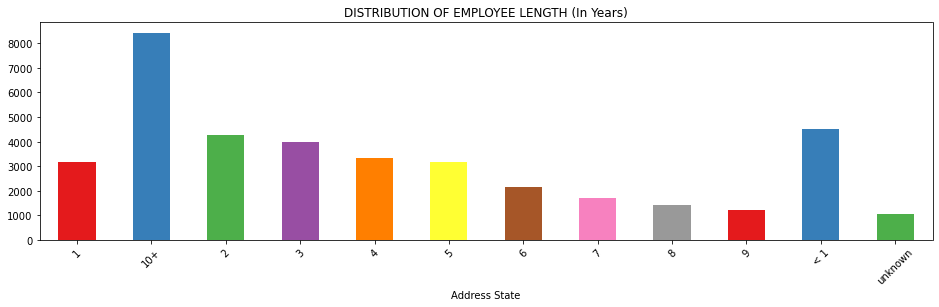

In [89]:
# Univariate Analysis

loan_df.emp_length.value_counts().sort_index().plot(kind = 'bar', color=pal, figsize = [16,4])
plt.title('DISTRIBUTION OF EMPLOYEE LENGTH (In Years)')
plt.xlabel('Address State')
plt.xticks(rotation=45)
plt.show()

>**Maximum number of customers have work experience of 10+ years** 

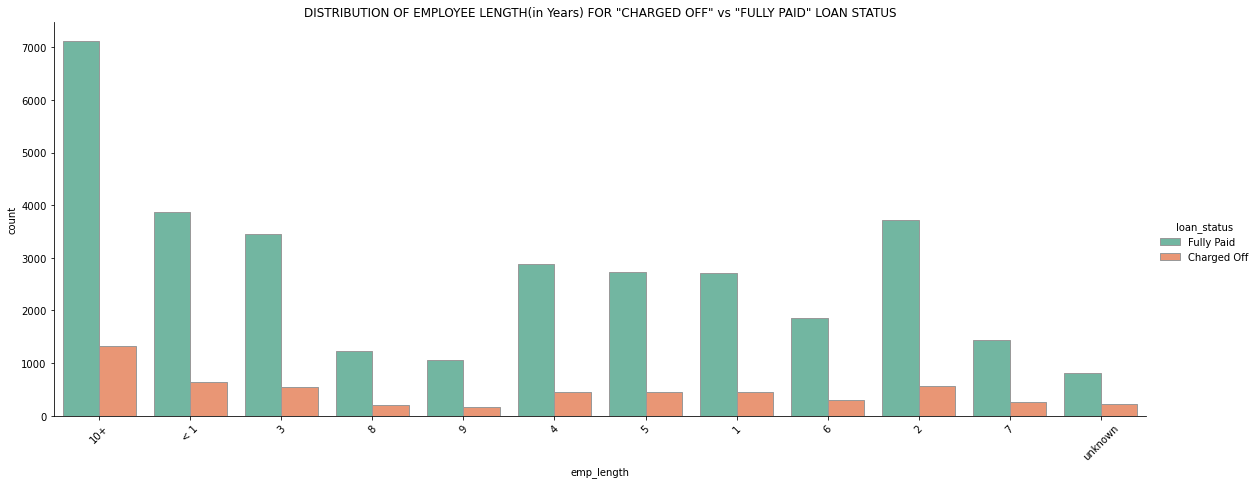

In [90]:
# Segmented Univariate Analysis

import numpy as np
import matplotlib.pyplot as plt

sns.catplot(x="emp_length", hue="loan_status", kind="count",
            palette=pal2, edgecolor=".6",
            data=loan_df, height=6, aspect=16/6);
plt.title('DISTRIBUTION OF EMPLOYEE LENGTH(in Years) FOR "CHARGED OFF" vs "FULLY PAID" LOAN STATUS')
plt.xticks(rotation = 45)
plt.show()

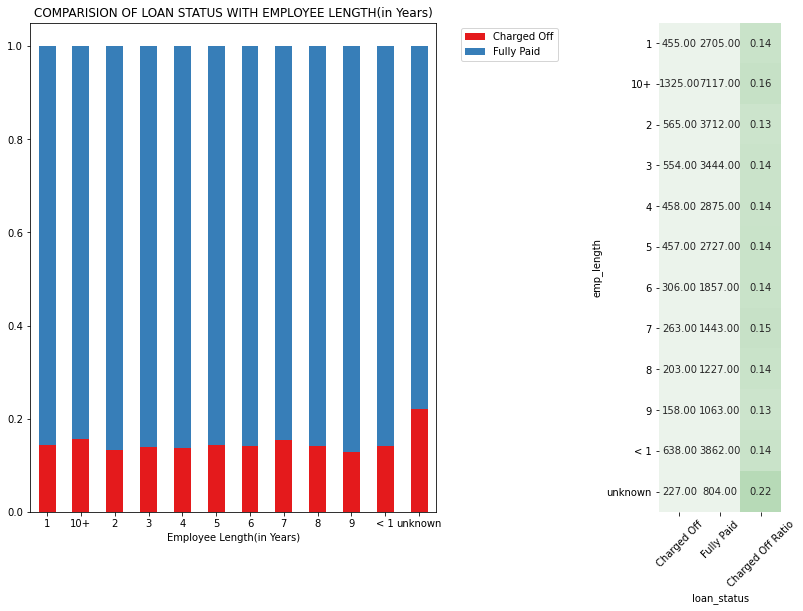

In [91]:
# Bivariate Analysis

fig, axes = plt.subplots(1, 2, figsize = [16,9])

loan_df.groupby('emp_length')['loan_status'].value_counts(normalize=True).unstack().plot(kind = 'bar', stacked = True, color=pal, ax=axes[0], linewidth=0.7)
axes[0].legend(bbox_to_anchor = (1.05,1))
axes[0].set_xlabel('Employee Length(in Years)')
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=0)
axes[0].set_title('COMPARISION OF LOAN STATUS WITH EMPLOYEE LENGTH(in Years)')    

columns = ["emp_length", 'loan_status']
cm = sns.light_palette("green", as_cmap=True)
contingency_matrix = pd.crosstab(loan_df[columns[0]], loan_df[columns[1]])#.style.background_gradient(cmap = cm)
contingency_matrix['Charged Off Ratio'] = contingency_matrix['Charged Off'] / (contingency_matrix['Charged Off'] + contingency_matrix['Fully Paid'])

ax = axes[1]
ax.set_aspect(1)
columns = ['Charged Off Ratio']
mymatrix = contingency_matrix.copy()
mask = mymatrix.columns.isin(columns)
mymatrix.loc[:, ~mask] = 0
res = sns.heatmap(mymatrix, annot=contingency_matrix, vmin=0, vmax=1, fmt='.2f',cmap=cm, cbar=False)
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45)
axes[1].set_yticklabels(axes[1].get_yticklabels(), rotation=0)

plt.savefig("crosstab_pandas.png")
plt.show()

## Inference:
>**From the plot above, we can see that the customers with emplyment length 10+ years are having higher rate of defaults, if we ignore unknown values. But, there is no pattern observed for other length of years.**

## 4.b Multivariate Analysis

### 4b.1 Analysing annual income with other columns for more insights

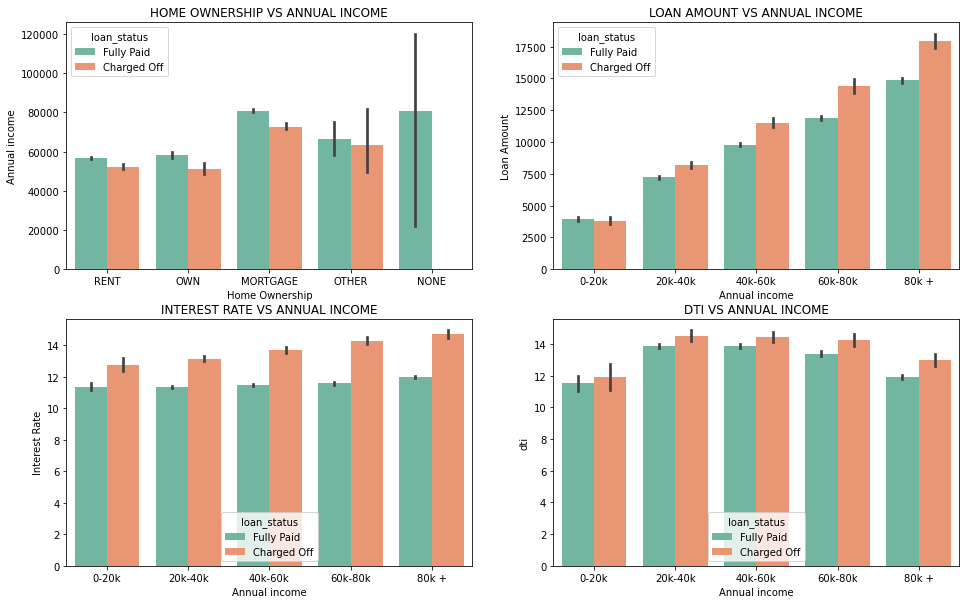

In [92]:
fig, axes = plt.subplots(2, 2, figsize = [16,10])
sns.barplot(x='home_ownership', y='annual_inc', hue="loan_status", data=loan_df, palette=pal2, ax=axes[0][0])
axes[0][0].set_ylabel('Annual income')
axes[0][0].set_xlabel('Home Ownership')
axes[0][0].set_title('Home Ownership vs Annual income'.upper())

sns.barplot(x='annual_inc_cats', y='loan_amnt', hue="loan_status", data=loan_df, palette=pal2, ax=axes[0][1])
axes[0][1].set_xlabel('Annual income')
axes[0][1].set_ylabel('Loan Amount')
axes[0][1].set_title('Loan Amount vs Annual income'.upper())

sns.barplot(x='annual_inc_cats', y='int_rate', hue="loan_status", data=loan_df, palette=pal2, ax=axes[1][0])
axes[1][0].set_xlabel('Annual income')
axes[1][0].set_ylabel('Interest Rate')
axes[1][0].set_title('Interest Rate vs Annual income'.upper())

sns.barplot(x='annual_inc_cats', y='dti', hue="loan_status", data=loan_df, palette=pal2, ax=axes[1][1])
axes[1][1].set_xlabel('Annual income')
axes[1][1].set_ylabel('dti')
axes[1][1].set_title('Dti vs Annual income'.upper())
plt.show()

## Inference:
>**Across all the income groups, the following parameters are higher for the customers who defaulted:-**
- **Loan Amount**
- **Interest Rate**
- **Debt-to-Income Ratio**

## 5. Conclusion

### a. Observations 
> - 50% of customers apply loans in the range of 5275 to 15000
- Most of the customers have mortgage home or are on rent
- 50% of customers have interest rate between 8.17% to 18.57%

### b. Risk Analysis  
> - Higher the loan amount, more likely the customers are to be defaulted
- At higher interest rate, customers are more likely to be defaulted
- Small_business owners are the highest defaulters
- People with higher income default less
- The rate of defaulters increases from grade A to grade G
- Grade G has highest rate of defaulters, especially when - Annual Income is between 60k to 80k, Loan Amount is between 17500 to 20000 and Interest Rate is above 20%
- The customers with higher sub_grades are ‘risky’ applicants, especially with F5, G5, G3, G2 sub-grades
- The rate of defaulters is more in case of 60 months term
- The rate of defaulters gradually increase from lower debt-to-income ratio to higher debt-to-income ratio
- The top 3 states, having highest chances of getting default customers are NE, NV and SD
- There is more possibilty of defaulters in 1st quater of the year compared to 3rd and 4th quaters
- The customers with employment length 10+ years are having higher rate of defaulters, if we ignore unknown values. But, there is no pattern observed for other length of years
- Across all the income groups, "Loan Amount", "Interest Rate" and "Debt-to-Income Ratio" are higher for the customers who defaulted

> **DRIVING FACTORS: -
           loan_amnt, int_rate, purpose, annual_inc, grade, sub_grade, term, dti, address_state, issue_month**

> **NON-DRIVING FACTORS: -
           home_ownership, verification_status, issue_year, emp_length**
